# REAL RACING 3 VEHICLES - DATA ANALYSIS

# ANALYSIS 1 (Revision 3)

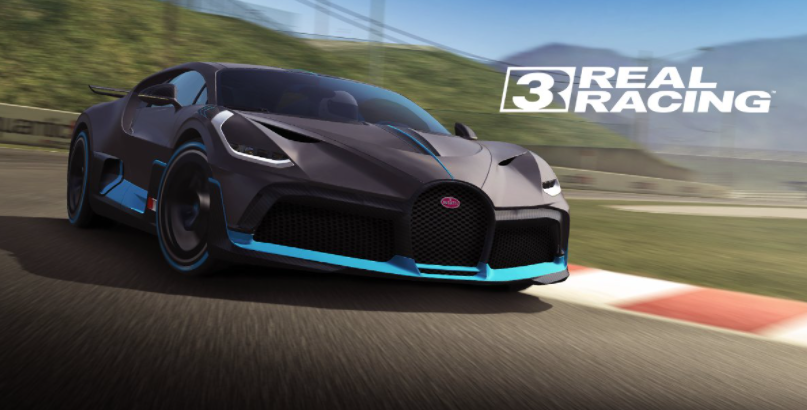

### **Welcome to my 1st part of data analysis page for Real Racing 3 Vehicles!**

This first analysis part has been **revised for game version 10.1**, in order to keep the analysis up-to-date for the currently available vehicles in the game.

As always, let's begin with importing the necessary modules first.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

And, of course, we have to read the data frame that contains all vehicles...

**Important:** It seems that GitHub causes some tables to have unusual resizing and/or print weird characters when the dollar sign `$` appeared in the dataset during rendering. To avoid this issue, all values in `Price` that contain `$` should be changed before the analyses begin.

In [2]:
rr3_df = pd.read_csv('real_racing_3_vehicles_v10_1.csv')

In [3]:
for i in range(len(rr3_df)):
    if type(rr3_df.loc[i, 'Price']) != float and rr3_df.loc[i, 'Price'][-1] == '$':
        s = rr3_df.loc[i, 'Price'][:-1] + 'dollar'
        rr3_df.loc[i, 'Price'] = s

Let's see what we have in the first 10 rows:

In [4]:
rr3_df.head(10)

,Manufacturer,Model,PR,Top Speed,Acceleration,Braking,Grip,Class,Type,Series,Price,Service Time,Service Cost,Availability,Exclusive Events,In Main Career
0,Acura,NSX (2017),46.7,306,3.10,31.7,1.09,S,M4,1,450 Gold,180,1665.0,Yes,No,No
1,Acura,NSX GT3,65.2,274,3.02,29.6,1.65,R,MR,2,750 Gold,180,1990.0,Yes,No,No
2,Acura,ARX-05,78.5,322,2.80,25.6,1.76,R,MR,1,850 Gold,180,1997.0,Yes,No,No
3,Alfa Romeo,Giulietta TCR,34.5,241,5.30,29.3,1.30,R,FF,1,180 Gold,180,1332.0,Yes,No,No
4,Alfa Romeo,4C,29.4,257,4.34,30.2,1.05,P,MR,1,200 Gold,180,1415.0,Yes,No,No
5,Alfa Romeo,155 V6 TI,38.0,274,4.60,29.0,1.35,R,F4,2,300 Gold,180,1665.0,Yes,Yes,No
6,Ariel,Atom 3.5,44.5,249,2.70,30.5,1.00,S,RR,2,255000 Rdollar,140,1170.0,Yes,No,Yes
7,Ariel,Atom V8,61.1,322,2.30,30.5,1.20,S,RR,3,150 Gold,180,1402.0,Yes,Yes,Yes
8,Aston Martin,DB9,28.2,295,4.50,32.0,1.00,P,FR,4,230000 Rdollar,130,1132.0,Yes,No,Yes
9,Aston Martin,Vanquish,33.6,295,4.10,31.4,1.02,P,FR,3,110 Gold,150,1230.0,Yes,No,Yes


**The dataset is prepared properly then, good!**

Let's start with some basic ones: For instance, get the manufacturer and the model name of the **80th vehicle** in the data frame:

In [5]:
rr3_df.loc[79, ['Manufacturer', 'Model']]

Manufacturer               Chevrolet
Model           Corvette C8.R (2020)
Name: 79, dtype: object

Well, this returns **multiple values** as we performed extraction from two columns with the specific row number while observing the output above.

But, I want it to be appeared as a plain text:

In [6]:
print(rr3_df.loc[79, 'Manufacturer'] + ' ' + rr3_df.loc[79, 'Model'])

Chevrolet Corvette C8.R (2020)


Carefully realize that I used the **number minus 1** as the indices start at zero.

OK, what are the specs of the vehicle at **130th index**?

In [7]:
rr3_df.loc[130, 'PR':'Grip']

PR              79.3
Top Speed        332
Acceleration    2.83
Braking         26.2
Grip            1.77
Name: 130, dtype: object

Hmmm, according to the base stats above, this probably looks like a **super sports car**, I suppose... Maybe, they might fit to one of the **motorsports car**, too, who knows...

Anyway, this time, I'd like to see the **price to buy**, **total service time** and **cost** for the **300th vehicle**:

In [8]:
rr3_df.loc[299, ['Price', 'Service Time', 'Service Cost']]

Price           1000 Gold
Service Time          180
Service Cost       2037.0
Name: 299, dtype: object

According to these results, it should be an expensive sports car that belongs to a well-known manufacturer. Well, the value 180 for **Service Time** means the vehicle needs **180 minutes** for servicing and 2037 for **Service Cost** means you've got to spend **2037 R$** to begin servicing that vehicle.

How about the **classes** and **types** for vehicles between **251st and 260th** index?

In [9]:
rr3_df.loc[251:260, ['Class', 'Type']]

,Class,Type
251,S,MR
252,S,M4
253,S,MR
254,R,M4
255,S,M4
256,R,MR
257,S,MR
258,S,M4
259,R,M4
260,S,M4


All right, we can inspect vehicles individually like these all day. But now, let's get more detailed info about this dataset.

First of all, **these are the columns in the dataset** I'm working with:

In [10]:
rr3_df.columns

Index(['Manufacturer', 'Model', 'PR', 'Top Speed', 'Acceleration', 'Braking',
       'Grip', 'Class', 'Type', 'Series', 'Price', 'Service Time',
       'Service Cost', 'Availability', 'Exclusive Events', 'In Main Career'],
      dtype='object')

Here's the current shape of the dataframe: 

In [11]:
rr3_df.shape

(410, 16)

From these numbers, there are **410 rows**, i.e. 410 vehicles existed in the dataset; plus **16 different features**.

How about the general statistics of the features which hold **numerical values** (i.e. those with data type of `float64`)?

In [12]:
round(rr3_df.describe(), 2)

,PR,Top Speed,Acceleration,Braking,Grip,Series,Service Time,Service Cost
count,410.00,410.00,410.00,410.00,410.00,410.00,410.00,407.00
mean,54.17,305.25,3.50,29.62,1.43,2.03,168.78,1140.92
std,28.25,47.51,1.12,5.82,0.59,1.13,53.25,755.07
min,0.10,180.00,1.90,14.30,0.72,1.00,1.00,0.00
25%,39.85,274.00,2.80,27.40,1.05,1.00,175.00,369.50
50%,50.60,311.00,3.30,29.90,1.28,2.00,180.00,1402.00
75%,69.45,330.00,3.80,31.70,1.56,3.00,180.00,1806.00
max,130.30,502.00,8.20,48.80,4.00,7.00,325.00,2192.00


**Whoa, look at that!** That's lots of info we obtained just from one command! Later, all these numbers were rounded for easier reading.

Well, these numbers already explain itself! But, in case you didn't understand what they meant, let me clarify:

* **mean** is the average
* **std** is the standard deviation
* **min** and **max** are the minimum and the maximum values
* **25%**, **50%**, **75%** are the 25th percentile, 50th percentile (median), and 75th percentile values, respectively.

What makes me wondering is that why the count value for **Service Cost** is not the exact number (which is 3 less), when compared against the count of other features above.

Therefore, I want to find out which row(s) have that kind of missing values, possibly **NaN values**.

In [13]:
rr3_df[rr3_df['Service Cost'].isnull()]

,Manufacturer,Model,PR,Top Speed,Acceleration,Braking,Grip,Class,Type,Series,Price,Service Time,Service Cost,Availability,Exclusive Events,In Main Career
66,Bugatti,Bolide,96.0,500,2.1,29.0,2.25,S,M4,1,1150 Gold,180,NaN,Yes,Yes,No
334,Nissan,Leaf Nismo RC,42.6,220,3.4,29.0,1.20,R,M4,1,600 Gold,180,NaN,Yes,No,No
408,Volkswagen,XL Sport,23.7,270,5.5,32.0,1.25,R,M4,1,NaN,180,NaN,Yes,No,No


Ah, all right! I remembered that **Bugatti Bolide**,  **Nissan Leaf Nismo RC** and **Volkswagen XL Sport** were the newest vehicles, where the first one was added in **version 10.0** and the rest were added in **version 10.1**. Perhaps, I could not obtain the values from the related source website, as they appeared with _question mark (?)_, at the time this analysis was being carried out. I should consider filling those values ASAP.

Furthermore, **seasonal events** exist in the game for several versions (starting at **version 9.6** if I'm not wrong) which were divided into **rounds** that continue until new version was released. Each round features **a prize vehicle** and, in the list above, **Volkswagen XL Sport** is such one. However, it's much more difficult to obtain its original price and service cost unless the enough amount of **Victory Points** were earned!

OK, let's continue motivating ourselves...

With `describe()` method, I've seen many **descriptive decimal values**. Can I do the same with `numpy` methods? Let's try them on **PR** column:

In [14]:
PR = rr3_df['PR'].values
print("Count: {}, Mean: {:.4}, Std. dev.: {:.6}".format(PR.size, PR.mean(), PR.std()))

Count: 410, Mean: 54.17, Std. dev.: 28.2184


In [15]:
print("Min: {}, Max: {}".format(PR.min(), PR.max()))

Min: 0.1, Max: 130.3


In [16]:
print("25th, 50th, 75th  precent values are {}".format(np.percentile(PR, [25, 50, 75])))

25th, 50th, 75th  precent values are [39.85 50.6  69.45]


Yep, they are all doable and exactly the same values were encountered! There is only **a minor difference** at standard deviation value, though...

By obtaining this information above, I'd like to get the names of vehicles which have **the lowest** PR values:

In [17]:
lowest_PR = rr3_df[rr3_df['PR'] == 0.1]
lowest_PR.loc[:, ['Manufacturer', 'Model', 'Price']]

,Manufacturer,Model,Price
279,Mazda,RX-3,50 Gold
315,Nissan,Skyline 2000 GT-R (KPGC10),50 Gold
341,Porsche,911 Targa (1974),53000 Rdollar


Hmm, the lowest PR value is shared by **3 vehicles**, not 1! Well, although **1974 model Porsche 911 Targa** is purchasable with R$, I wonder why **Mazda RX-3** and **Nissan Skyline 2000 GT-R** cost Gold to buy!

How about the vehicle with **the highest PR** value?

In [18]:
highest_PR = rr3_df[rr3_df['PR'] == 130.3]
highest_PR.iloc[:]

,Manufacturer,Model,PR,Top Speed,Acceleration,Braking,Grip,Class,Type,Series,Price,Service Time,Service Cost,Availability,Exclusive Events,In Main Career
300,McLaren,MP4-X,130.3,402,1.9,14.3,4.0,R,MR(MHD),2,1200 Gold,240,2117.0,Yes,Yes,No


Wow! That's, **McLaren MP4-X**, a futuristic F1-inspired hypercar! This vehicle really deserves to have the highest PR value in the game in terms of its stats. It has **the highest acceleration, cornering grip and lowest braking distance**! However, it **doesn't have the highest top speed**. _(Check these values with the ones above properly)_

So, which one has **the highest top speed**, then?

In [30]:
highest_TS = rr3_df['Top Speed'].max()
highest_TS_name = rr3_df[rr3_df['Top Speed'] == highest_TS]
highest_TS_name[['Manufacturer', 'Model', 'PR', 'Top Speed', 'Acceleration', 'Braking', 'Grip', 'Price']]

,Manufacturer,Model,PR,Top Speed,Acceleration,Braking,Grip,Price
225,Hennessey,Venom F5,84.5,502,2.52,25.9,1.69,1000 Gold


Oh! **Hennessey Venom F5**, which is available with version 9.x, has the highest top speed (502 kph, more than 310 mph) even with **no upgrades**! But, the other stat attributes are not enough to put the vehicle above 100 PR, as revealed above.

Now, I wonder which vehicle appears the most throughout all career series (be it main, bonus or exclusive series):

In [20]:
highest_series = rr3_df['Series'].max()
rr3_df[rr3_df['Series'] == highest_series]

,Manufacturer,Model,PR,Top Speed,Acceleration,Braking,Grip,Class,Type,Series,Price,Service Time,Service Cost,Availability,Exclusive Events,In Main Career
361,Porsche,918 Spyder Concept,60.2,322,3.0,30.2,1.4,S,M4,7,845000 Rdollar,215,1605.0,Yes,No,Yes


Ah yes, one of my favourite vehicle here, and still it is even in the latest version: **Porsche 918 Spyder Concept**. This should be a smart choice for any racer to go for full upgrade, right?

OK, lastly, through these numbers above (the stats we've seen with `describe()`), I noticed that the **minimum required servicing time is just 1 minute**.

Thus, which vehicle does almost not need much servicing time?

In [21]:
minimum_service_time = rr3_df['Service Time'].min()
rr3_df[rr3_df['Service Time'] == minimum_service_time]

,Manufacturer,Model,PR,Top Speed,Acceleration,Braking,Grip,Class,Type,Series,Price,Service Time,Service Cost,Availability,Exclusive Events,In Main Career
312,Nissan,Silvia (S15),1.7,243,5.5,34.4,0.85,P,FR(RHD),3,25700 Rdollar,1,342.0,Yes,No,Yes


Hey, that's our good ol' friend **Nissan Silvia (S15)**! That was our first vehicle ever to own in the game, yes? Plus, it shouldn't be so expensive to get it to fully upgraded, though!

In contrast, now, which one has **the highest servicing time**?

In [31]:
max_service_time = rr3_df['Service Time'].max()
rr3_df[rr3_df['Service Time'] == max_service_time]

,Manufacturer,Model,PR,Top Speed,Acceleration,Braking,Grip,Class,Type,Series,Price,Service Time,Service Cost,Availability,Exclusive Events,In Main Career
406,Toyota,TS040 Hybrid (2014),89.4,394,2.5,26.2,1.82,R,M4,2,950 Gold,325,2192.0,Yes,No,Yes


Ah, it's a **Toyota**! But, not a street legal vehicle; instead, from _Endurance Motorsport Series_ in Motorsports section and _Endurance Legends_ in Legend section of Road Collection. I figured out that it also needs **325 minutes** (i.e. 5 hours 25 minutes) to have it fully serviced. Likewise, **the highest servicing cost** belongs to this vehicle, too (2192 R$)!

Speaking of the servicing time, what could be **the median value** of this?

In [34]:
median_service_time = rr3_df['Service Time'].median()
print("Median of service time is {:.0f} minutes.".format(median_service_time))
count_median_service_time = rr3_df[rr3_df['Service Time'] == median_service_time].shape[0]
print("And {} vehicles have this duration of servicing time.".format(count_median_service_time))

Median of service time is 180 minutes.
And 248 vehicles have this duration of servicing time.


OK, it's not surprising that the median value is **180 minutes = 3 hours**, since almost all of new vehicles that were arrived throughout the latest updates, have their service times set to that value. In the latest game version 10.1, it's been raised to **248** vehicles!

In [33]:
print("Ratio of vehicles having service time of 3 hours: {:.2f} percent".format(
    count_median_service_time/rr3_df.shape[0] * 100))

Ratio of vehicles having service time of 3 hours: 60.49 percent


By doing a simple calculation here, we imply that this value accounts for **approximately 60.5%** of the vehicles in total!

Another thing is that, there does exist vehicles **with NO service costs**. Interesting, right? But, what are those?

In [45]:
no_service_cost = rr3_df[rr3_df['Service Cost'] == 0]
print(no_service_cost.shape[0], "vehicles are free to service!")
no_service_cost.loc[:,['Manufacturer', 'Model', 'Class', 'Service Time', 'Price']]

99 vehicles are free to service!


,Manufacturer,Model,Class,Service Time,Price
16,Aston Martin,Vantage GTE (2019),R,180,1950000 Mdollar
18,Aston Martin,V8 Vantage GT2,R,180,1900000 Mdollar
19,Aston Martin,Vantage GT4,R,180,1000000 Mdollar
20,Aston Martin,DBR1-2,R,180,2300000 Mdollar
32,Audi,R8 LMS GT4,R,180,1000000 Mdollar
...,...,...,...,...,...
372,Porsche,718 Cayman GT4 Clubsport,R,180,1000000 Mdollar
373,Porsche,RS Spyder Evo,R,180,2000000 Mdollar
403,Toyota,Camry (Joe Gibbs Racing - 2020),R,180,2150000 Mdollar
404,Toyota,Camry (Joe Gibbs Racing - 2021),R,180,2150000 Mdollar


Oh my goodness! We came across many vehicles! These are all from **Motorsports Discipline!**. It is good to know that you don't need to pay anything when you want to service one of these vehicles listed above (though the list is shrunk due to space limits).

Here, I would like to see the Manufacturers and their counts of vehicles that belong to that scenario:

In [47]:
no_service_cost['Manufacturer'].value_counts()

Formula 1       33
Formula E       31
Chevrolet       12
Porsche          6
Aston Martin     4
Ford             4
Toyota           3
Audi             2
BMW              1
Bentley          1
McLaren          1
Mercedes-AMG     1
Name: Manufacturer, dtype: int64

Whoa! **Formula 1** and **Formula E** are at the top of this count! In reality, there are many different teams that participated, but the game prefers they should all be encapsulated within the related disciplines, no matter which season it was.

If we categorize them in a broad manner, these are **Formula 1 2019, 2020 and 2021 Season, Formula E Season 6 and 7 (including several ones from previous seasons, such as 3, 4 and 5), NASCAR 2020 and 2021 Season, GT3 class, GT4 class, EuroMaster class**, and **several other classes from Endurance and Prototype Series**. What they have in common is that, of course, they need **180 minutes** to service!

Notice that the count of **Chevrolet** is the highest when we think about the individual manufacturers. Let me reveal these vehicles:

In [52]:
no_service_cost[no_service_cost['Manufacturer'] == 'Chevrolet'][['Manufacturer', 'Model', 'Availability']]

,Manufacturer,Model,Availability
77,Chevrolet,Corvette Grand Sport,Yes
78,Chevrolet,Camaro Z/28 (Racing),Yes
79,Chevrolet,Corvette C8.R (2020),Yes
89,Chevrolet,Camaro ZL1 1LE (Hendrick Motorsports - 2020),No
90,Chevrolet,Camaro ZL1 1LE (Chip Ganassi Racing - 2020),No
91,Chevrolet,Camaro ZL1 1LE (Richard Childress Racing - 2020),No
92,Chevrolet,Camaro ZL1 1LE (Richard Petty Motorsports - 2020),No
93,Chevrolet,Camaro ZL1 1LE (Hendrick Motorsports - 2021),No
94,Chevrolet,Camaro ZL1 1LE (Chip Ganassi Racing - 2021),No
95,Chevrolet,Camaro ZL1 1LE (Richard Childress Racing - 2021),No


Ah, among all, **8 of them** are from **NASCAR**! However, they are no longer available for purchase in the game, as they all had **limited time** to get one. Lastly, remember that 2021 Season NASCAR vehicles were discontinued after **1st Feburary 2022** midnight! It's just 'Take it or leave it' situation...

In addition, all these vehicles can be obtained only with the special `Mdollar` currency, **introduced in game version 8.0** with the arrival of 2019 Season Formula 1 cars. 

If you are eager to own them all in the current state, then you would need:

In [53]:
def get_mdollars(vals):
    n = []
    for v in vals:
        n.append(int(v[:-8]))
    return n
mdollars = get_mdollars(no_service_cost['Price'].values)
print("You need {} Mdollars to own all motorsport vehicles.".format(sum(mdollars)))

You need 196550000 Mdollars to own all motorsport vehicles.


Moreover, there is a daily limit where you can earn up to M$250,000. So, **how many days should you play consecutively** in order to buy all of these vehicles?

In [54]:
print("You need to play for {:.0f} consecutive days!".format(sum(mdollars) / 250000))

You need to play for 786 consecutive days!


Oh man! That's **little more than two years**! I even don't count the **other criterions** for incomes and expenses, such as bonus M$ from events, upgrades, tuning setups, driver levels and team principal levels.

On to the next one; we know that when a new version is delivered to the game, it generally selects **one**, **two** or even **three** vehicles to be eligible for **Exclusive Events**. However, in order to unlock to these events, you need to **fully upgrade** those vehicles! Yet, their durabilities are **doubled** when all of the upgrades are completed.

Well, how many of them have gained the right to be accessed to its own exclusive events?

In [59]:
print(rr3_df['Exclusive Events'].value_counts())
print("*** That accounts for {:.2f} percent. ***".format(
     len(rr3_df[rr3_df['Exclusive Events'] == 'Yes']) / len(rr3_df) * 100))

No     312
Yes     98
Name: Exclusive Events, dtype: int64
*** That accounts for 23.90 percent. ***


Well, total of **98** vehicles. In future versions, we are sure it can exceed 100...

If possible, can I name several of them arbitrarily?

In [63]:
rr3_exclusive = rr3_df[rr3_df['Exclusive Events'] == 'Yes']
rr3_exclusive.sample(n=15, random_state=1)[['Manufacturer', 'Model', 'Price']]

,Manufacturer,Model,Price
382,Porsche,936/77 Spyder,740 Gold
327,Nissan,Silvia (S15) R3 Spec,300 Gold
120,Ferrari,F12TDF,720 Gold
80,Chevrolet,Corvette C6.R GT2,450 Gold
308,Mercedes-Benz,CLK-LM,640 Gold
52,BMW,M5,375 Gold
409,Volkswagen,ID.R,1100 Gold
317,Nissan,240Z (S30),50 Gold
293,McLaren,720S Coupe,650 Gold
276,Lotus,Evija,1100 Gold


This random list indicates that any vehicle with exclusive events might be cheap or expensive. So, it's up to you if you'd like to access those events, then you need a pile of **Gold** and **R$** for full upgrades.

Lastly, let me investigate the vehicles in **main career series** that you can race with them in **Road Collection**. In order to own all, then you need:

In [72]:
def get_total_curr_counts(vals):
    r, g = 0, 0
    for v in vals:
        if v[-7:] == 'Rdollar':   r += 1
        elif v[-4:] == 'Gold':    g += 1
    return r, g
def get_total_prices(vals):
    r, g = [], []
    for v in vals:
        if v[-7:] == 'Rdollar':   r.append(int(v[:-8]))
        elif v[-4:] == 'Gold':    g.append(int(v[:-5]))
    return r, g
rr3_main_career = rr3_df[rr3_df['In Main Career'] == 'Yes']
rdollar_cnt, gold_cnt = get_total_curr_counts(rr3_main_career['Price'].values)
print("There are {} vehicles available in main career series. ({} with R$, {} with Gold)".format(
    rr3_main_career.shape[0], rdollar_cnt, gold_cnt))
print("*** This accounts for {:.2f} percent. ***".format((rr3_main_career.shape[0] / rr3_df.shape[0]) * 100))
rdollars, golds = get_total_prices(rr3_main_career['Price'].values)
print("\nYou should accumulate {} R$ and {} Gold to buy all these vehicles.".format(sum(rdollars), sum(golds)))

There are 94 vehicles available in main career series. (65 with R$, 29 with Gold)
*** This accounts for 22.93 percent. ***

You should accumulate 33006755 R$ and 14045 Gold to buy all these vehicles.


Let's print some examples of vehicles from main career series:

In [73]:
rr3_main_career.sample(n=15, random_state=1)[['Manufacturer', 'Model', 'Price']]

,Manufacturer,Model,Price
118,Ferrari,F12Berlinetta,320 Gold
104,Dodge,Viper SRT10 Coupe,108820 Rdollar
136,Ford,Shelby GT500,63100 Rdollar
361,Porsche,918 Spyder Concept,845000 Rdollar
347,Porsche,911 GT3 Cup,265500 Rdollar
140,Ford,GT FIA GT1,374600 Rdollar
303,Mercedes-Benz,SLS AMG,260000 Rdollar
135,Ford,Focus RS,33000 Rdollar
337,Pagani,Zonda F,1280000 Rdollar
319,Nissan,GT-R Premium (R35),170000 Rdollar


### **All right folks, that's all for the 1st part of analysis for Vehicles in Real Racing 3!**

**In the next part, the aim is to reveal more statistical info for better insight of this dataset; and putting a few visualization charts will be nice!**

## As always, keep racing!